# Outlier Removal

In [1]:
import pandas as pd
Dataset = pd.read_excel ('Dataset.xlsx')
Dataset

,Percentage,Interlayer,SSA,AMR,BR,CR,Cation,Anion,Molarity,PW,Config,CD,Capacitance
0,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,2.0,83.0
1,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,3.0,71.0
2,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,5.0,64.0
3,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,7.0,59.0
4,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,10.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0.0,0.66,8.71,80.0,10.0,10.0,3.31,3.00,1.0,0.5,3,7.5,120.0
651,0.0,0.66,8.71,80.0,10.0,10.0,3.31,3.00,1.0,0.5,3,10.0,80.0
652,0.0,0.66,8.71,80.0,10.0,10.0,3.31,3.00,1.0,0.5,3,12.5,73.0
653,0.0,0.66,8.71,80.0,10.0,10.0,3.31,3.00,1.0,0.5,3,15.0,58.0


In [3]:
mask = ((Dataset['SSA'] <= 100) | (Dataset['SSA'].isnull())) & \
       (Dataset['CD'] <= 30) & \
       (Dataset['Capacitance'] <= 800) & \
       Dataset['Molarity'].notnull()
DatasetTBI = Dataset.loc[mask]
DatasetTBI.to_excel('DatasetTBI.xlsx', index=False)
DatasetTBI

,Percentage,Interlayer,SSA,AMR,BR,CR,Cation,Anion,Molarity,PW,Config,CD,Capacitance
0,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,2.0,83.0
1,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,3.0,71.0
2,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,5.0,64.0
3,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,7.0,59.0
4,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,10.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0.0,0.66,8.71,80.0,10.0,10.0,3.31,3.00,1.0,0.5,3,7.5,120.0
651,0.0,0.66,8.71,80.0,10.0,10.0,3.31,3.00,1.0,0.5,3,10.0,80.0
652,0.0,0.66,8.71,80.0,10.0,10.0,3.31,3.00,1.0,0.5,3,12.5,73.0
653,0.0,0.66,8.71,80.0,10.0,10.0,3.31,3.00,1.0,0.5,3,15.0,58.0


# Missing Values

In [5]:
missing_values = DatasetTBI.isnull().sum()  
missing_percentage = (missing_values / len(Dataset)) * 100  

total_missing = missing_values.sum()
total_percentage = (total_missing / Dataset.size) * 100

formatted_missing_values = missing_values.astype(str)
formatted_missing_percentage = missing_percentage.map(lambda x: f"{x:.2f}%")

missing_summary = pd.DataFrame({
    'Missing Values': formatted_missing_values,
    'Missing Percentage': formatted_missing_percentage
})

print("Missing Values Summary:\n", missing_summary)

# Display total missing values and percentage
print(f"\nTotal Missing Values: {total_missing}")
print(f"Total Missing Percentage: {total_percentage:.2f}%")

Missing Values Summary:
             Missing Values Missing Percentage
Percentage               0              0.00%
Interlayer               0              0.00%
SSA                    259             39.54%
AMR                     50              7.63%
BR                      50              7.63%
CR                      19              2.90%
Cation                   0              0.00%
Anion                    0              0.00%
Molarity                 0              0.00%
PW                       0              0.00%
Config                   0              0.00%
CD                       0              0.00%
Capacitance              0              0.00%

Total Missing Values: 378
Total Missing Percentage: 4.44%


# Importing Imputed Data

In [27]:
DatasetI= pd.read_excel ('DatasetI3-CART.xlsx')
DatasetI

,Percentage,Interlayer,SSA,AMR,BR,CR,Cation,Anion,Molarity,PW,Config,CD,Capacitance
0,12.9,0.66,14.80,80,10,10,3.58,3.79,1.0,0.5,3,2.0,83.0
1,12.9,0.66,14.80,80,10,10,3.58,3.79,1.0,0.5,3,3.0,71.0
2,12.9,0.66,14.80,80,10,10,3.58,3.79,1.0,0.5,3,5.0,64.0
3,12.9,0.66,14.80,80,10,10,3.58,3.79,1.0,0.5,3,7.0,59.0
4,12.9,0.66,14.80,80,10,10,3.58,3.79,1.0,0.5,3,10.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,0.0,0.66,8.71,80,10,10,3.31,3.00,1.0,0.5,3,7.5,120.0
617,0.0,0.66,8.71,80,10,10,3.31,3.00,1.0,0.5,3,10.0,80.0
618,0.0,0.66,8.71,80,10,10,3.31,3.00,1.0,0.5,3,12.5,73.0
619,0.0,0.66,8.71,80,10,10,3.31,3.00,1.0,0.5,3,15.0,58.0


# Pearson correlation

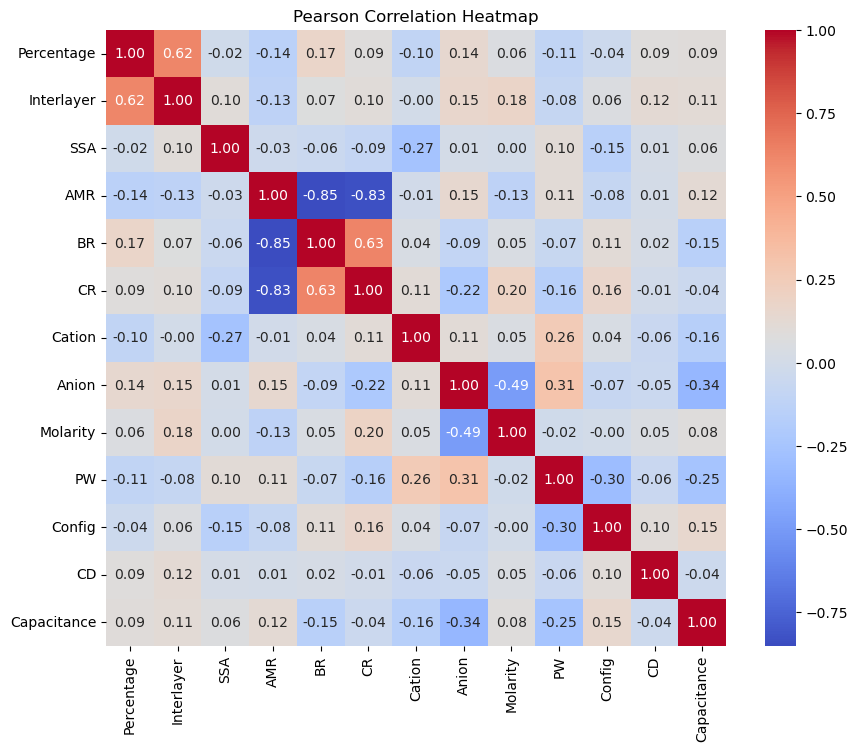

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = DatasetI.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

# Smaller Dataset

In [31]:
Dataset = pd.read_excel('DatasetTBI.xlsx')
Smaller_Dataset = Dataset.dropna()
Smaller_Dataset.to_excel("Smaller Dataset.xlsx", index=False)

In [33]:
Smaller_Dataset

,Percentage,Interlayer,SSA,AMR,BR,CR,Cation,Anion,Molarity,PW,Config,CD,Capacitance
0,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,2.0,83.0
1,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,3.0,71.0
2,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,5.0,64.0
3,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,7.0,59.0
4,12.9,0.66,14.80,80.0,10.0,10.0,3.58,3.79,1.0,0.5,3,10.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,0.0,0.66,8.71,80.0,10.0,10.0,3.31,3.00,1.0,0.5,3,7.5,120.0
617,0.0,0.66,8.71,80.0,10.0,10.0,3.31,3.00,1.0,0.5,3,10.0,80.0
618,0.0,0.66,8.71,80.0,10.0,10.0,3.31,3.00,1.0,0.5,3,12.5,73.0
619,0.0,0.66,8.71,80.0,10.0,10.0,3.31,3.00,1.0,0.5,3,15.0,58.0
